In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab

# Import data

In [2]:
raw = pd.read_csv("datasets_4123_6408_framingham.csv")

In [3]:
raw.head()
# demographic attributes .iloc[:,0:2]
# Behavioral attributes .iloc[:,3,4]
# medical history .iloc[:,5,8]
# medical condition .iloc[:,9:-2]
# predict variable .iloc[:,-1]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Data insights

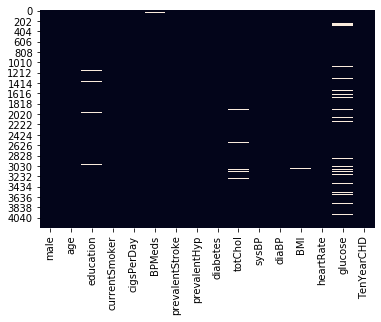

In [4]:
sn.heatmap(raw.isnull(),cbar=False)

In [20]:
raw.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


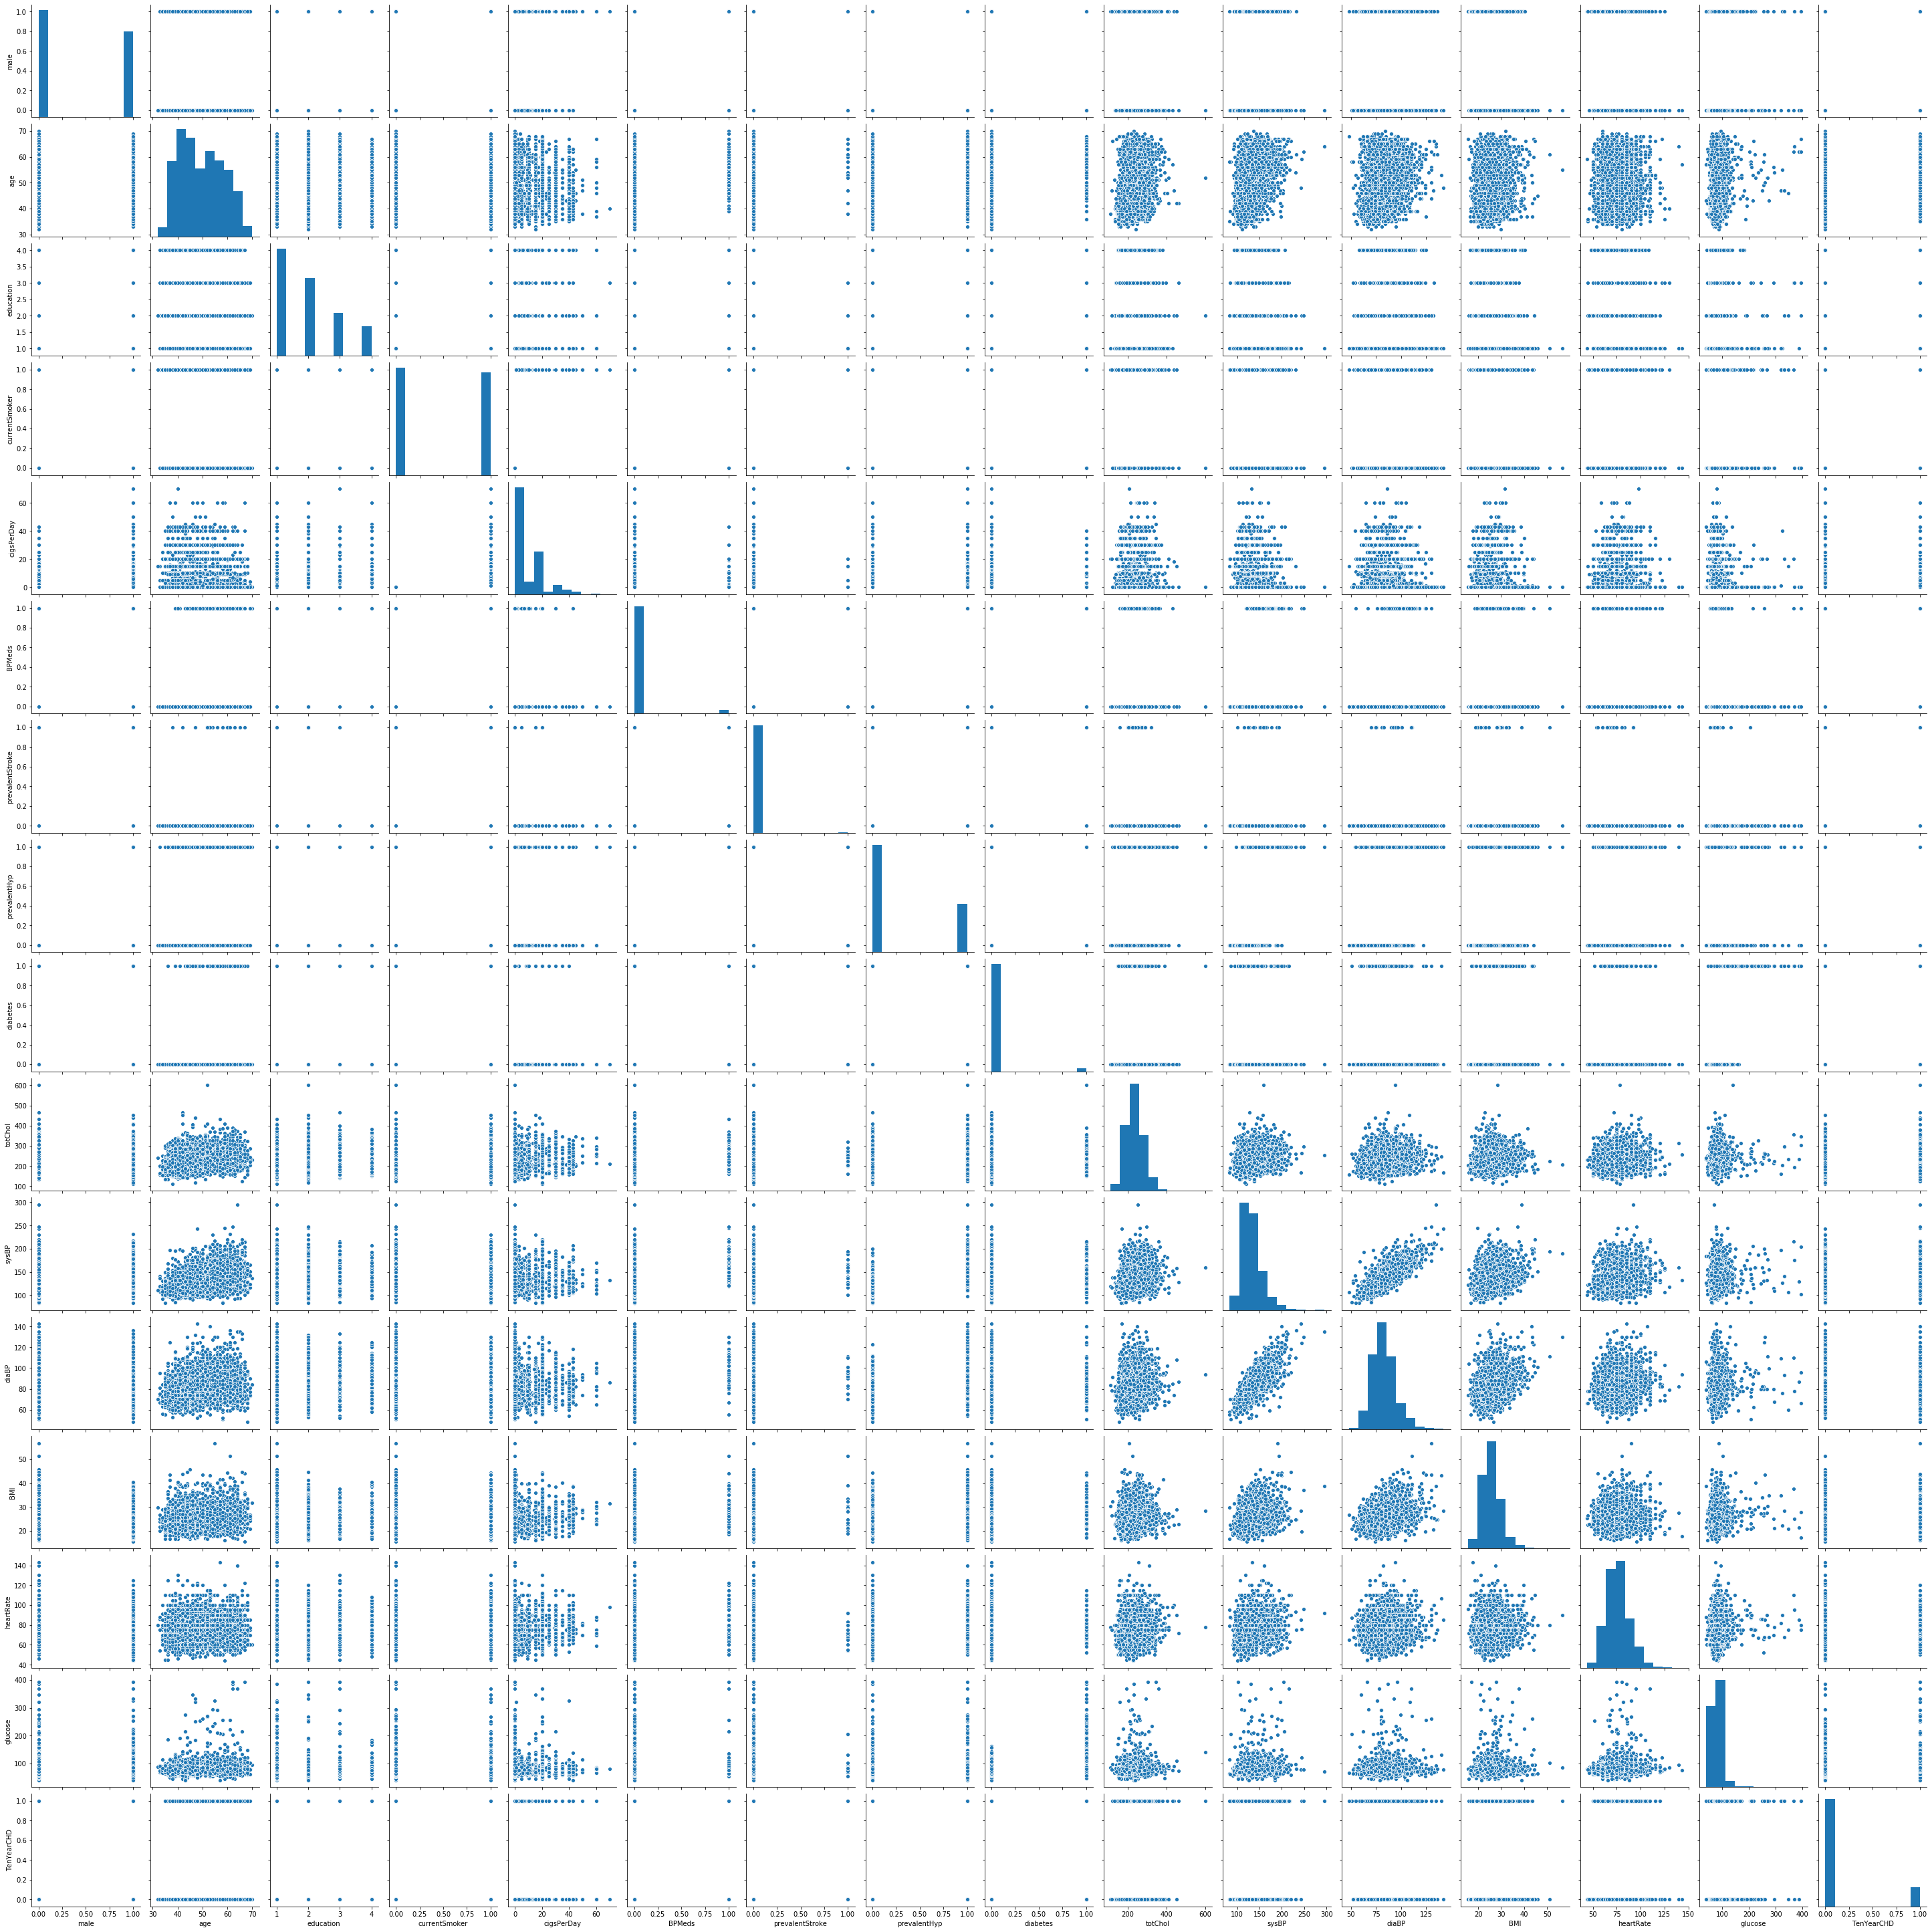

In [24]:
# sn.pairplot(raw.iloc[:len(cleaned_raw//2)])

0    3596
1     644
Name: TenYearCHD, dtype: int64


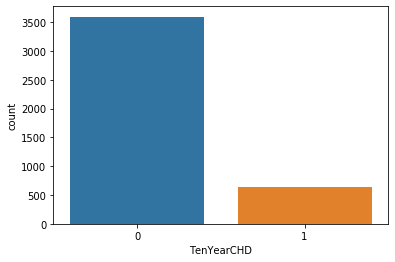

In [5]:
# biased data?
print(raw.TenYearCHD.value_counts())
sn.countplot(x='TenYearCHD', data=raw)

# Data Quality


In [9]:
heart_df = raw.dropna(axis=0)
# infer the nulls


In [10]:
from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(heart_df)
heart_df_constant.head()
# balance the dataset

,const,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


1. Use the right evaluation metrics
 
Applying inappropriate evaluation metrics for model generated using imbalanced data can be dangerous. Imagine our training data is the one illustrated in graph above. If accuracy is used to measure the goodness of a model, a model which classifies all testing samples into “0” will have an excellent accuracy (99.8%), but obviously, this model won’t provide any valuable information for us.

In this case, other alternative evaluation metrics can be applied such as:

Precision/Specificity: how many selected instances are relevant.
Recall/Sensitivity: how many relevant instances are selected.
F1 score: harmonic mean of precision and recall.
MCC: correlation coefficient between the observed and predicted binary classifications.
AUC: relation between true-positive rate and false positive rate.
 

2. Resample the training set
 
Apart from using different evaluation criteria, one can also work on getting different dataset. Two approaches to make a balanced dataset out of an imbalanced one are under-sampling and over-sampling.

2.1. Under-sampling

Under-sampling balances the dataset by reducing the size of the abundant class. This method is used when quantity of data is sufficient. By keeping all samples in the rare class and randomly selecting an equal number of samples in the abundant class, a balanced new dataset can be retrieved for further modelling.

2.2. Over-sampling

On the contrary, oversampling is used when the quantity of data is insufficient. It tries to balance dataset by increasing the size of rare samples. Rather than getting rid of abundant samples, new rare samples are generated by using e.g. repetition, bootstrapping or SMOTE (Synthetic Minority Over-Sampling Technique) [1].

Note that there is no absolute advantage of one resampling method over another. Application of these two methods depends on the use case it applies to and the dataset itself. A combination of over- and under-sampling is often successful as well.

 

3. Use K-fold Cross-Validation in the right way
 
It is noteworthy that cross-validation should be applied properly while using over-sampling method to address imbalance problems.

Keep in mind that over-sampling takes observed rare samples and applies bootstrapping to generate new random data based on a distribution function. If cross-validation is applied after over-sampling, basically what we are doing is overfitting our model to a specific artificial bootstrapping result. That is why cross-validation should always be done before over-sampling the data, just as how feature selection should be implemented. Only by resampling the data repeatedly, randomness can be introduced into the dataset to make sure that there won’t be an overfitting problem.

 

4. Ensemble different resampled datasets
 
The easiest way to successfully generalize a model is by using more data. The problem is that out-of-the-box classifiers like logistic regression or random forest tend to generalize by discarding the rare class. One easy best practice is building n models that use all the samples of the rare class and n-differing samples of the abundant class. Given that you want to ensemble 10 models, you would keep e.g. the 1.000 cases of the rare class and randomly sample 10.000 cases of the abundant class. Then you just split the 10.000 cases in 10 chunks and train 10 different models. This approach is simple and perfectly horizontally scalable if you have a lot of data, since you can just train and run your models on different cluster nodes. Ensemble models also tend to generalize better, which makes this approach easy to handle.

 

5. Resample with different ratios
 
The previous approach can be fine-tuned by playing with the ratio between the rare and the abundant class. The best ratio  heavily depends on the data and the models that are used. But instead of training all models with the same ratio in the ensemble, it is worth trying to ensemble different ratios.  So if 10 models are trained, it might make sense to have a model that has a ratio of 1:1 (rare:abundant) and another one with 1:3, or even 2:1. Depending on the model used this can influence the weight that one class gets.

6. Generate synthetic samples

A technique similar to upsampling is to create synthetic samples. Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model. Again, it’s important to generate the new samples only in the training set to ensure our model generalizes well to unseen data.

7. Cluster the abundant class
 
An elegant approach was proposed by Sergey on Quora [2]. Instead of relying on random samples to cover the variety of the training samples, he suggests clustering the abundant class in r groups, with r being the number of cases in r. For each group, only the medoid (centre of cluster) is kept. The model is then trained with the rare class and the medoids only.

 

8. Design your own models
 
All the previous methods focus on the data and keep the models as a fixed component. But in fact, there is no need to resample the data if the model is suited for imbalanced data. The famous XGBoost is already a good starting point if the classes are not skewed too much, because it internally takes care that the bags it trains on are not imbalanced. But then again, the data is resampled, it is just happening secretly.

By designing a cost function that is penalizing wrong classification of the rare class more than wrong classifications of the abundant class, it is possible to design many models that naturally generalize in favour of the rare class. For example, tweaking an SVM to penalize wrong classifications of the rare class by the same ratio that this class is underrepresented.

9. Penalized Models

Penalized classification imposes an additional cost on the model for making classification mistakes on the minority class during training. These penalties can bias the model to pay more attention to the minority class. Often the handling of class penalties or weights are specialized to the learning algorithm. There are penalized versions of algorithms such as penalized-SVM and penalized-LDA. It is also possible to have generic frameworks for penalized models. For example, Weka has a CostSensitiveClassifier that can wrap any classifier and apply a custom penalty matrix for miss classification. Using penalization is desirable if you are locked into a specific algorithm and are unable to resample or you’re getting poor results. It provides yet another way to “balance” the classes. Setting up the penalty matrix can be complex. You will very likely have to try a variety of penalty schemes and see what works best for your problem.

- Final Remarks
 
This is not an exclusive list of techniques, but rather a starting point to handle imbalanced data. There is no best approach or model suited for all problems and it is strongly recommended to try different techniques and models to evaluate what works best. Try to be creative and combine different approaches. It is also important, to be aware that in many domains (e.g. fraud detection, real-time-bidding), where imbalanced classes occur, the “market-rules” are constantly changing. So, check if past data might have become obsolete.


https://datascience.stackexchange.com/a/12239/105172

# Logistic Regression

### ADVANTAGES
I can see two main advantages of logistic regression over Chi2 or Fischer's exact test. The first is you can include more than one explanatory variable (dependent variable) and those can either be dichotomous, ordinal, or continuous. The second is that logistic regression provides a quantified value for the strength of the association adjusting for other variables (removes confounding effects). The exponential of coefficients correspond to odd ratios for the given factor.
### DISADVANTAGE
- You need enough participants with each possible set of explanatory variable. Using interaction or adding factors that a rare therefore reduce considerably the power of the analysis. This has to be carefully considered at the planning phase to make sure the sample size is large enough.
- If you are using a dependent variable that is not binomial, you need to test the assumption of linearity before including it in the model. This is possible by first creating dummy variables for each value of an ordinal variable or by cutting down a continuous variable in different categories, and then using them as dummy variables. Likelihood ratio test can then be used to test if the model assuming linearity is similar to the one not assuming it. This has the major advantage of increasing the power of your analysis. It can require some transformation.
- Logistic regression combines both binomial and normal distribution. This can sometimes cause problems. Quadrature check can be used to verify that these problems did not occur. Relative differences must be bellow 0.01 (1%) for all parameters.
- Defining variables to enter in the model, adding, or removing explanatory variables can be complicated and must be carefully planned. Avoid important collinearity between variables as this will cause over-adjustement. Identify potential candidates using univariate analysis with a p-value threshold above the one you wish to use at the end as negative confounding can occur. When necessary consider introducing interaction terms if you are to believe some factors might increase the effects of others on your outcome.


In [6]:
# In probability theory and statistics, the chi-square distribution with k degrees of freedom is the distribution of a sum of the squares of k independent standard normal random variables
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)

In [11]:
cols = heart_df_constant.columns[:-1]

In [12]:
model=sm.Logit(heart_df.TenYearCHD,heart_df_constant[cols])

In [13]:
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.376500
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3642
Method:                           MLE   Df Model:                           15
Date:                Thu, 25 Feb 2021   Pseudo R-squ.:                  0.1175
Time:                        15:25:22   Log-Likelihood:                -1377.2
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 6.676e-69
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3282      0.715    -11.640      0.000      -9.730      -6.926
male                0.5553      0.109      5.093      0.000       0.342       0.769
age                 0.0635      0.007      9.509      0.000       0.050       0.077
education          -0.0478      0.049     -0.967      0.334      -0.145       0.049
currentSmoker       0.0716      0.157      0.457      0.648      -0.236       0.379
cigsPerDay          0.0179      0.006      2.872      0.004       0.006       0.030
BPMeds              0.1625      0.234      0.693      0.488      -0.297       0.622
prevalentStroke     0.6937      0.490      1.417      0.157      -0.266       1.653
prevalentHyp        0.2342      0.138      1.697      0.090      -0.036       0.505
diabetes            0.0392      0.316      0.124      0.901      -0.579       0.658
totChol             0.0023      0.001      2.070      0.038       0.000       0.005
sysBP               0.0154      0.004      4.044      0.000       0.008       0.023
diaBP              -0.0042      0.006     -0.646      0.518      -0.017       0.008
BMI                 0.0067      0.013      0.523      0.601      -0.018       0.032
heartRate          -0.0032      0.004     -0.771      0.441      -0.012       0.005
glucose             0.0071      0.002      3.190      0.001       0.003       0.012
===================================================================================
"""

# Performance Review

- Confusion Matrix: a table showing correct predictions and types of incorrect predictions.
- Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
- Recall: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
- F1: Score: the weighted average of precision and recall.

### feature selection

It is used to remove those features that do not have a significant effect on the dependent variable or prediction of output. There are various ways to build a model in Machine Learning, which are:

- All-in
- Backward Elimination
- Forward Selection
- Bidirectional Elimination
- Score Comparison

Above are the possible methods for building the model in Machine learning, but we will only use here the Backward Elimination process as it is the fastest method.

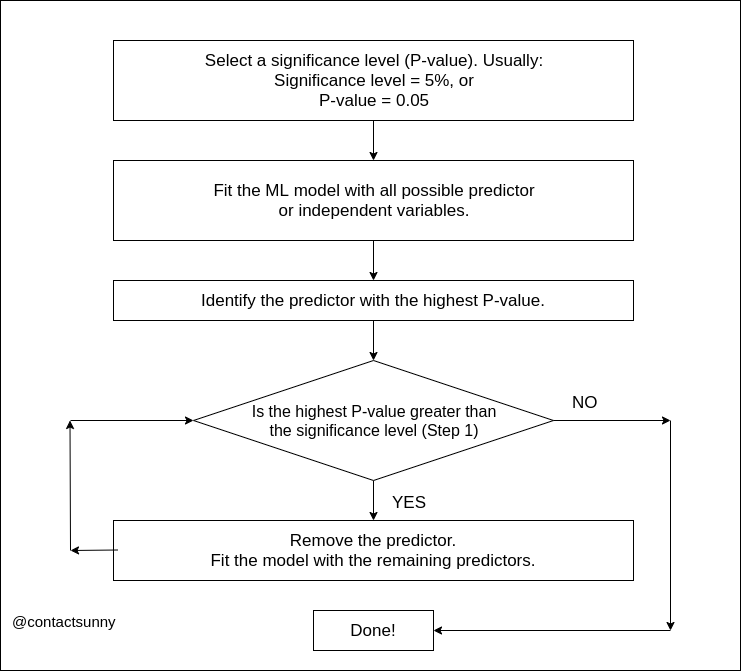


https://towardsdatascience.com/backward-elimination-for-feature-selection-in-machine-learning-c6a3a8f8cef4

In [14]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""
    
    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(heart_df_constant,heart_df.TenYearCHD,cols)

In [15]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3651
Method:                           MLE   Df Model:                            6
Date:                Thu, 25 Feb 2021   Pseudo R-squ.:                  0.1148
Time:                        15:26:01   Log-Likelihood:                -1381.4
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 2.408e-74
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1353      0.475    -19.213      0.000     -10.067      -8.203
male           0.5617      0.107      5.258      0.000       0.352       0.771
age            0.0660      0.006     10.267      0.000       0.053       0.079
cigsPerDay     0.0192      0.004      4.606      0.000       0.011       0.027
totChol        0.0023      0.001      2.031      0.042    8.01e-05       0.004
sysBP          0.0175      0.002      8.155      0.000       0.013       0.022
glucose        0.0073      0.002      4.343      0.000       0.004       0.011
==============================================================================
"""

$$P=\hspace{.2cm}e^{\beta_0 + \beta_1 X_1}\hspace{.2cm}/\hspace{.2cm}1+e^{\beta_0 +\beta_1 X_1}$$

$$logit(p) = log(p/(1-p))=\beta_0 +\beta_1\hspace{.1cm} *\hspace{.2cm} Sexmale\hspace{.2cm}+\beta_2\hspace{.1cm} * \hspace{.1cm}age\hspace{.2cm}+\hspace{.2cm}\beta_3\hspace{.1cm} *\hspace{.1cm} cigsPerDay\hspace{.2cm}+\hspace{.2cm}\beta_4 \hspace{.1cm}*\hspace{.1cm} totChol\hspace{.2cm}+\hspace{.2cm}\beta_5\hspace{.1cm} *\hspace{.1cm} sysBP\hspace{.2cm}+\hspace{.2cm}\beta_6\hspace{.1cm} *\hspace{.1cm} glucose\hspace{.2cm}$$

In [16]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const           0.000042       0.000274    0.000108   0.000
male            1.422325       2.161998    1.753586   0.000
age             1.054823       1.081727    1.068190   0.000
cigsPerDay      1.011106       1.027788    1.019413   0.000
totChol         1.000080       1.004491    1.002283   0.042
sysBP           1.013404       1.021977    1.017682   0.000
glucose         1.004004       1.010626    1.007310   0.000


In [19]:
import sklearn
from sklearn.cross_validation import train_test_split


In [22]:
# from sklearn.model_selection import cross_validate

In [20]:
new_features=heart_df[['age','male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [23]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

NameError: name 'x_train' is not defined

In [24]:
sklearn.metrics.accuracy_score(y_test,y_pred)

NameError: name 'y_test' is not defined

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

NameError: name 'y_test' is not defined

In [27]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

NameError: name 'cm' is not defined

In [28]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

NameError: name 'TP' is not defined

In [29]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

NameError: name 'x_test' is not defined

In [30]:
from sklearn.preprocessing import binarize

In [31]:

for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')
    

NameError: name 'x_test' is not defined

In [32]:
from sklearn.metrics import roc_curve

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

NameError: name 'y_test' is not defined

In [34]:
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

NameError: name 'y_test' is not defined